## Removendo objetos na imagem (Seam Carving)
***

Removendo Objetos de Uma Imagem: http://scikit-image.org/docs/dev/auto_examples/transform/plot_seam_carving.html

> This example demonstrates how images can be resized using seam carving [1]. Resizing to a new aspect ratio distorts image contents. Seam carving attempts to resize *without* distortion, by removing regions of an image which are less important. In this example we are using the Sobel filter to signify the importance of each pixel... [1] Shai Avidan and Ariel Shamir "Seam Carving for Content-Aware Image Resizing" http://www.cs.jhu.edu/~misha/ReadingSeminar/Papers/Avidan07.pdf

Ele olha para as regiões da imagem onde tenho baixa concentração de pixel e remove essas áreas. Para remover o objeto ao inves de olhar para regiões de baixa concentração de pixel, é só mudar o parâmetro e olhar para as que tenha alta concentração de pixels.

In [1]:
from skimage import data, draw
from skimage import transform, util
from skimage import filters, color
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Define um array para as cores
hl_color = np.array([0, 1, 0])

In [3]:
# Pega o dataset do skimage e pega uma imagem de um foguete
img = data.rocket()

In [4]:
# Coloca a imagem como float
img = util.img_as_float(img)

In [5]:
# Aplica o filtro SOBEL
eimg = filters.sobel(color.rgb2gray(img))

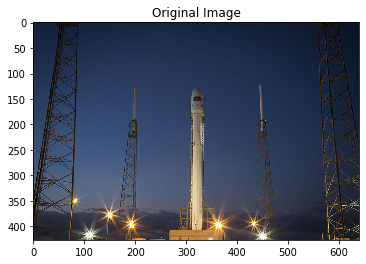

In [6]:
# Plota a imagem original
plt.title('Original Image')
plt.imshow(img)

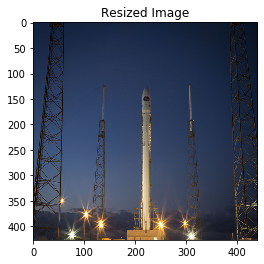

In [7]:
# Redimensiona a imagem sem levar em conta o conteudo
resized = transform.resize(img, (img.shape[0], img.shape[1] - 200), mode='reflect')
plt.figure()
plt.title('Resized Image')
plt.imshow(resized)

In [ ]:
# Faz o redimensionamento tendo como base o conteúdo
out = transform.seam_carve(img, eimg, 'vertical', 200)
plt.figure()
plt.title('Resized using Seam Carving')
plt.imshow(out)

![img](https://user-images.githubusercontent.com/14116020/72210897-d0c1e080-34a0-11ea-8e6e-585993d7f274.png)

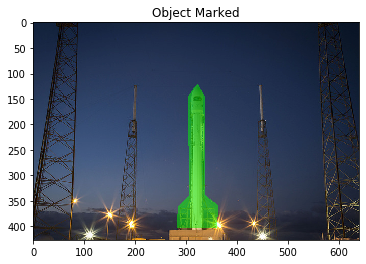

In [8]:
# Marca o objeto foguete para sua remoção
# Resizing distorts the rocket and surrounding objects, whereas seam carving
# removes empty spaces and preserves object proportions.
#
# Object Removal
# --------------
#
# Seam carving can also be used to remove artifacts from images. This
# requires weighting the artifact with low values. Recall lower weights are
# preferentially removed in seam carving. The following code masks the
# rocket's region with low weights, indicating it should be removed.

masked_img = img.copy()

poly = [(404, 281), (404, 360), (359, 364),
        (338, 337), (145, 337), (120, 322),
        (145, 304), (340, 306), (362, 284)]
pr = np.array([p[0] for p in poly])
pc = np.array([p[1] for p in poly])
rr, cc = draw.polygon(pr, pc)

masked_img[rr, cc, :] = masked_img[rr, cc, :]*0.5 + hl_color*.5
plt.figure()
plt.title('Object Marked')

plt.imshow(masked_img)

In [ ]:
# Remove o foguete
eimg[rr, cc] -= 1000

plt.figure()
plt.title('Object Removed')
out = transform.seam_carve(img, eimg, 'vertical', 90)
resized = transform.resize(img, out.shape, mode='reflect')
plt.imshow(out)
plt.show()

![img1](https://user-images.githubusercontent.com/14116020/72210898-d0c1e080-34a0-11ea-957d-a865ab35aac0.png)